# 1. Exploratory Data Analysis
Importing the libraries

In [2]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set and perform hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# to scale features
from sklearn.preprocessing import StandardScaler

# to plot feature importance for xgboost
from xgboost import plot_importance

# to save the final model on disk
import joblib

import os
mingw_path = 'C:\\MinGW\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

ModuleNotFoundError: No module named 'seaborn'

In [288]:
np.set_printoptions(precision=2, suppress=True)

## 1.1 Reading the data

In [289]:
df = pd.read_csv("data/employee_data.csv")

In [290]:
# Dataframe dimensions
df.shape

(14249, 10)

In [291]:
# Columns of the dataframe
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')

In [292]:
# First 5 rows
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [293]:
# Column datatypes
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

Make sure all the data types make sense and none seems incorrect

In [294]:
# Last 5 rows
df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


## 1.2 Distribution of numeric features

array([[<Axes: title={'center': 'avg_monthly_hrs'}>,
        <Axes: title={'center': 'filed_complaint'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'n_projects'}>,
        <Axes: title={'center': 'recently_promoted'}>,
        <Axes: title={'center': 'satisfaction'}>],
       [<Axes: title={'center': 'tenure'}>, <Axes: >, <Axes: >]],
      dtype=object)

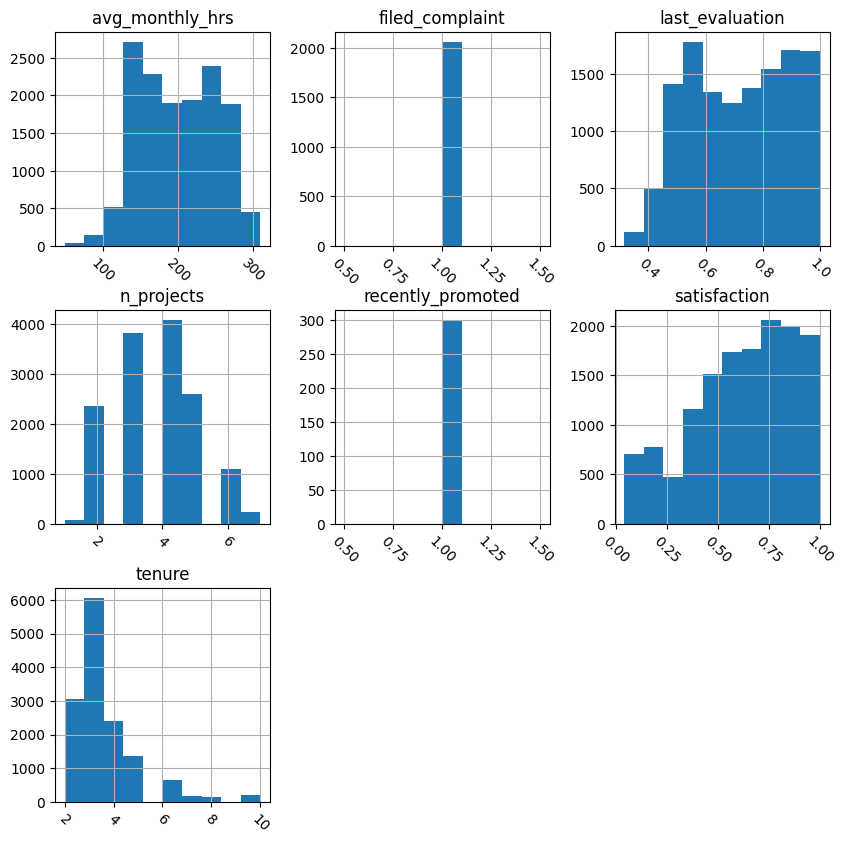

In [295]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

**Observations:**
* 'filed_complaint' and 'recently_promoted' must be binary indicator variables.
* 'last_evaluation' ranges approx from 0.4 to 1
* 'satisfaction' ranges approx from 0 to 1
* 'tenure' for most of the employees is less than or equal to 5 years
* 'n_projects' ranges between 2 to 6

Let's plot the kde for avg no of hrs

<Figure size 800x600 with 0 Axes>

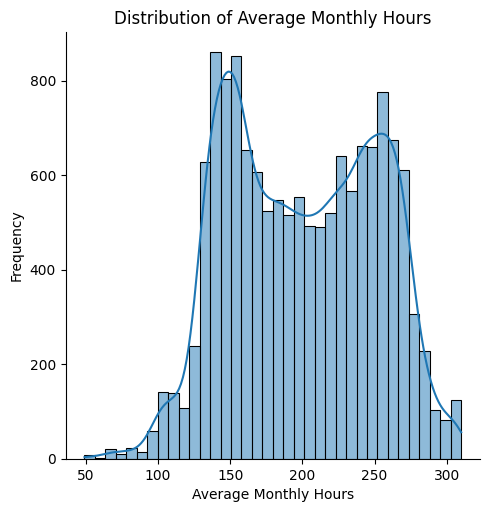

In [296]:
plt.figure(figsize=(8,6))
sns.displot(df['avg_monthly_hrs'], kde=True)
plt.title("Distribution of Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Frequency")
plt.show()

* Some employees work for around 150 hrs/month i.e. 37.5 hrs/week which is reasonable.
* However there are employees who work for 250 hrs/month i.e. 62.5 hrs/week, which turns out to be 12.5 hrs/day (assuming an employee works 5 days per week). This is a very large number.

In [297]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


* Since standard deviation of 'filed_complaint' and 'recently promoted' is 0, they must be indicator variables.

## 1.3 Distribution of categorical features

In [298]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


Let's check the frequency of each class of these variables

In [299]:
df['department'].value_counts()

department
sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: count, dtype: int64

* 'IT' and 'information_technology' must be same departments.
* We must delete the employees belonging to 'temp' department as these are the employees which do not belong to any of the departments. After all, based on the project scope, we're only trying to build a model for permanent, full time employees.

<Axes: xlabel='count', ylabel='department'>

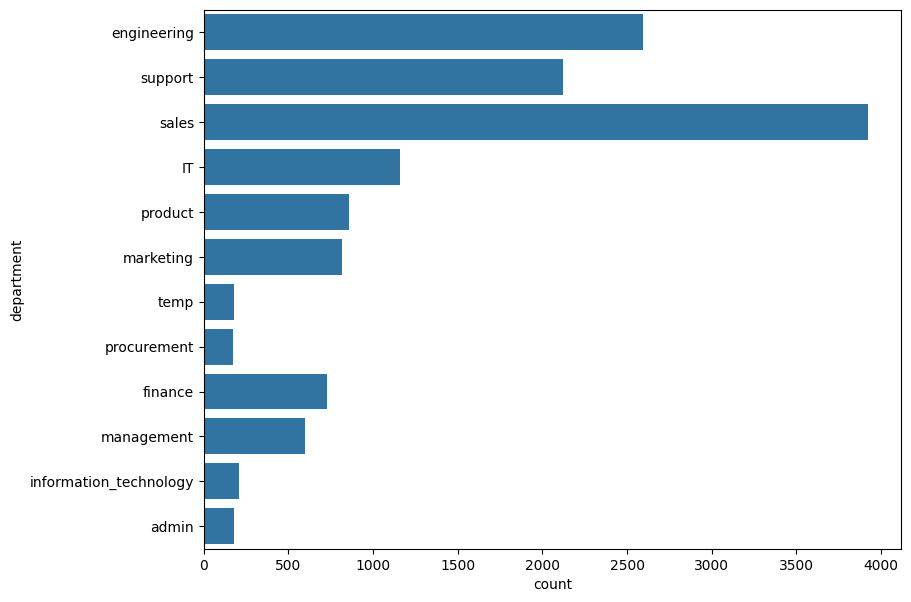

In [300]:

plt.figure(figsize=(9,7))
sns.countplot(y='department', data=df)

In [301]:
df['salary'].value_counts()

salary
low       6952
medium    6146
high      1151
Name: count, dtype: int64

In [302]:
df['status'].value_counts()

status
Employed    10857
Left         3392
Name: count, dtype: int64

Approx 23.8% of employees have left and 76.2% are still employeed.

This means the dataset is **not balanced**.

## 1.4 Segmentations
Segment the target variable (status) with key features - Univariate segmentations

<Axes: xlabel='satisfaction', ylabel='status'>

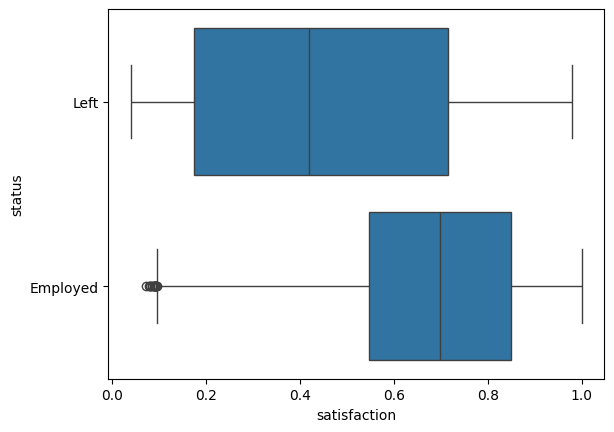

In [303]:
## status vs satisfaction
sns.boxplot(y='status', x='satisfaction', data=df)

This makes intuitive sense as current employees seem to be more satisfied than those who left

<Axes: xlabel='last_evaluation', ylabel='status'>

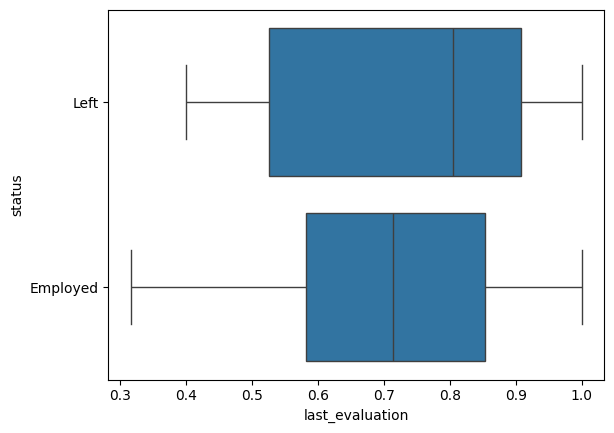

In [304]:
## status vs last_evaluation
sns.boxplot(y='status', x='last_evaluation', data=df)

In [305]:
# Segment by status and display the means within each class 
# selecting only numeric columns before grouping
df.groupby('status')[df.select_dtypes(include='number').columns].mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


### Bivariate segmentations

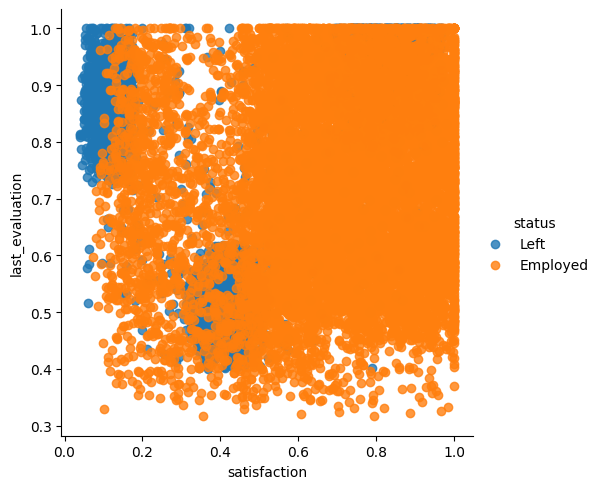

In [306]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=df, fit_reg=False)

* This is a **bivariate segmentation** because we are plotting the relationship between two variables while segmenting classes using color.
* It's a quick way to see if there are potential interactions between different features.

Below is a scatterplot of 'satisfaction' and 'last_evaluation', but only for employees who have 'Left'.

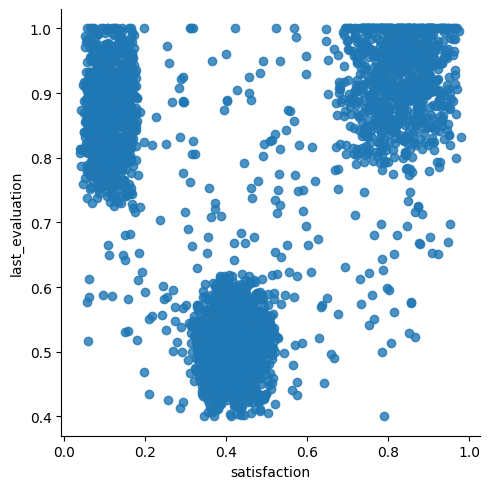

In [307]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

We see 3 clusters and we can try to group them as follows:
* satisfaction < 0.2 (we can name them as 'Unhappy')
* last_evaluation < 0.6 (we can name them as 'Underperformers')
* satisfaction > 0.7 and last_evaluation > 0.8 (We can name them as 'Overachievers')

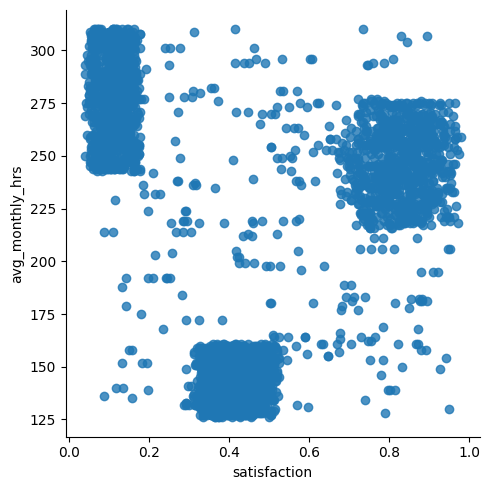

In [308]:
# Scatterplot of satisfaction vs. avg_monthly_hrs, only those who have left
sns.lmplot(x='satisfaction', y='avg_monthly_hrs', data=df[df.status == 'Left'], fit_reg=False)

We notice similar 3 clusters here as well.
* The left cluster (unhappy) -> putting a lot of effort and still not satisfied.
* The middle cluster (underperformer) -> not putting much effort.
* The right cluster (overachievers) -> putting more effort as well as satisfied

## 1.5 Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [309]:
df.select_dtypes(include='number').corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,NaN,0.340136,0.443221,NaN,-0.019622,0.124954
filed_complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,0.340136,NaN,1.000000,0.345590,NaN,0.089189,0.132100
n_projects,0.443221,NaN,0.345590,1.000000,NaN,-0.143514,0.192653
recently_promoted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction,-0.019622,NaN,0.089189,-0.143514,NaN,1.000000,-0.097301
tenure,0.124954,NaN,0.132100,0.192653,NaN,-0.097301,1.000000


<Axes: >

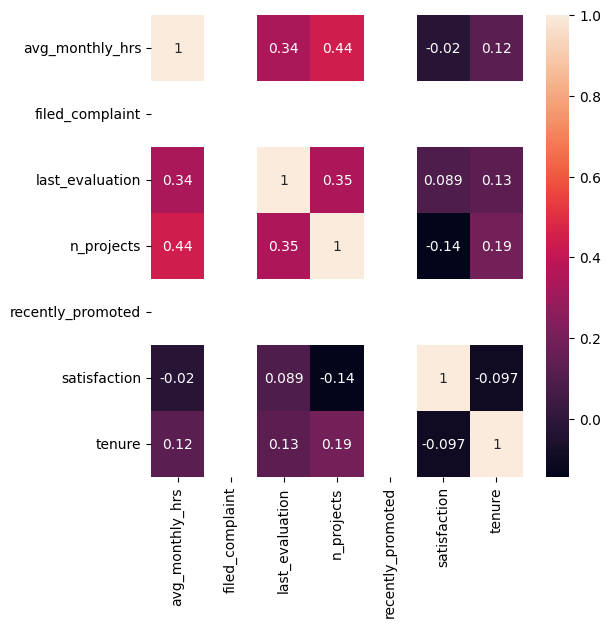

In [310]:
plt.figure(figsize=(6,6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

# 2. Data Cleaning
## 2.1 De-duplication and dropping unwanted observations

In [311]:
print(df.shape)

(14249, 10)


In [312]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(14221, 10)


28 observations were duplicates

** Drop the employees belonging to 'temp' department as discussed in EDA**

In [313]:
# Drop temporary workers
df = df[df.department != 'temp']
print(df.shape)

(14068, 10)


## 2.2 Fix structural errors

The 'filed_complaint' and 'recently_promoted' features, they only had values of 1 and NaN.

In [314]:
# Print unique values of 'filed_complaint'
print( df.filed_complaint.unique() )

# Print unique values of 'recently_promoted'
print( df.recently_promoted.unique() )

[nan  1.]
[nan  1.]


Even though the NaN values are "missing," they actually indicate employees who have not filed complaints or those who have not been recently promoted.

* Therefore, we should fill them in with the value 0.
* This will turn them into true indicator variables.

In [315]:
# Missing filed_complaint values should be 0
df['filed_complaint'] = df.filed_complaint.fillna(0)

# Missing recently_promoted values should be 0
df['recently_promoted'] = df.recently_promoted.fillna(0)

In [316]:
## Sanity check

# Print unique values of 'filed_complaint'
print( df.filed_complaint.unique() )

# Print unique values of 'recently_promoted'
print( df.recently_promoted.unique() )

[0. 1.]
[0. 1.]


## 2.3 Typos and capitalization

In EDA we saw 'IT' and 'information_technology' were labeled as separate classes. We need to fix it.

<Axes: xlabel='count', ylabel='department'>

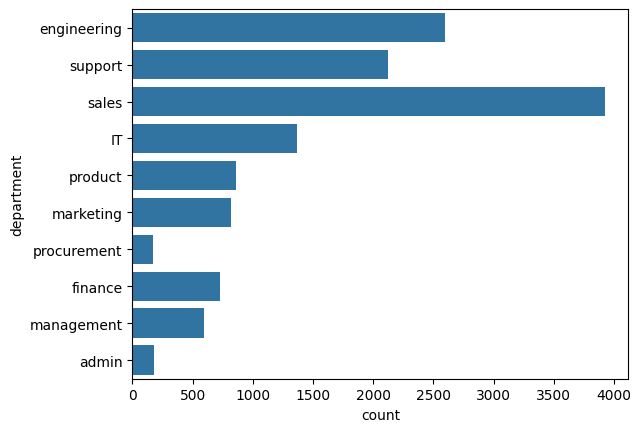

In [317]:
# 'information_technology' should be 'IT'
df.department.replace('information_technology', 'IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(y='department', data=df)

## 2.4 Outliers
An eye test for all the previous analysis tells us that it doesn't look like outliers will be a huge problem.

## 2.5 Missing Data

In [318]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

It looks like we have 1 categorical feature ('department') and 1 numeric feature ('last_evaluation') with missing data.

In [319]:
# Fill missing values in department with 'Missing'
# Equivalent to adding a new class
df['department'].fillna('Missing', inplace=True)

** Flag and fill missing numeric values**<br>
First, let's flag 'last_evaluation' with an indicator variable of missingness.

* 0 if not missing.
* 1 if missing.

Let's name the new indicator variable 'last_evaluation_missing'.

In [320]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

Then, simply fill in the original missing value with 0 just so your algorithms can run properly.

In [321]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

Display the number of missing values for each feature (both categorical and numeric) again, just to confirm.

In [322]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

# 3. Feature Engineering
* Since our dataset is larger, we don't really suffer from sparse classes as much.
* We won't always have a lot of domain knowledge for the problem. In these situations, we should rely on exploratory analysis to provide us hints better feature engineering.

## 3.1 Indicator Variables
Create 3 indicator variables for 'underperformer', 'unhappy' and 'overacheivers' as discussed in the scatterplot of 'satisfaction' and 'last_evaluation' for employees who have 'Left'.

Let's reproduce it here again.

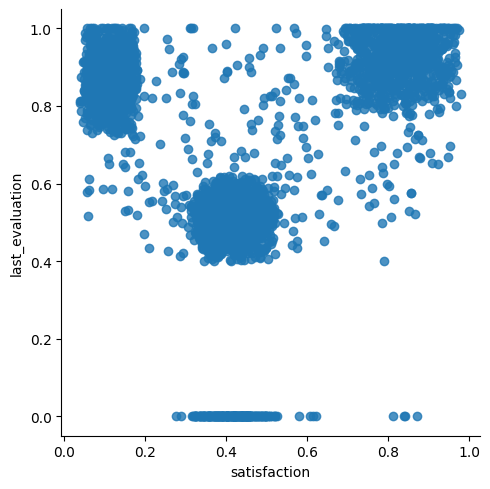

In [323]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

That looks different from the one we plotted previously.

* It's because we just flagged and filled missing values for 'last_evaluation' with 0.
* No problem, let's ignore those observations for now and focus on the top half of the plot.

Based on the top half, it looks like there are 3 clusters of people who left.
1. First, we have people with high 'last_evaluation' but low 'satisfaction'. Maybe these people were overqualified, frustrated, or unhappy in some other way.
2. Next, we have people with low 'last_evaluation' and medium 'satisfaction'. These were probably underperformers or poor cultural fits.
3. Finally, we have people with high 'last_evaluation' and high 'satisfaction'. Perhaps these were overachievers who found better offers elsewhere.

These roughly translate to 3 indicator features we can engineer:
1. 'underperformer' - last_evaluation < 0.6 and last_evaluation_missing == 0
2. 'unhappy' - satisfaction_level < 0.2
3. 'overachiever' - last_evaluation > 0.8 and satisfaction > 0.7

**Important:**
* For 'underperformer', it's important to include the condition 'last_evaluation_missing' == 0 to avoid those originally missing observations that we flagged and filled.
* By including this extra condition we are actually excluding the missing obseravtions from being counted as underperformers.

In [324]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation < 0.6) & 
                        (df.last_evaluation_missing == 0)).astype(int)

df['unhappy'] = (df.satisfaction < 0.2).astype(int)

df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [325]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

** Finally convert 'status' (target variable) into a binary indicator variable.**
* 'Left' should be 1
* 'Employed' should be 0

In [326]:
# Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

To confirm we did that correctly, display the proportion of people in our dataset who left.

In [327]:
# The proportion of observations who 'Left'
df.status.mean()

np.float64(0.23933750355416547)

Matches with the earlier count. Seems good

## 3.2 One-Hot Encoding for categorical variables

In [328]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,True,5.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,232,0.0,0.000000,3,0.0,0.834544,False,2.0,1,0,...,False,False,False,False,False,False,True,False,True,False
2,184,0.0,0.788830,3,0.0,0.834988,False,3.0,0,0,...,False,False,False,False,False,True,False,False,False,True
3,206,0.0,0.575688,4,0.0,0.424764,False,2.0,0,1,...,False,False,False,False,False,True,False,False,True,False
4,249,0.0,0.845217,3,0.0,0.779043,False,3.0,0,0,...,False,False,False,False,False,True,False,False,True,False
5,140,0.0,0.589097,4,0.0,0.660020,False,4.0,0,1,...,False,False,False,False,False,True,False,False,False,True
6,121,1.0,0.625399,3,0.0,0.835571,False,3.0,0,0,...,False,False,False,False,False,True,False,False,True,False
7,150,0.0,0.644586,4,0.0,0.796683,False,3.0,0,0,...,False,False,False,False,False,False,False,False,True,False
8,215,1.0,0.524114,3,0.0,0.715005,False,7.0,0,1,...,False,False,False,False,False,False,False,False,False,True
9,269,0.0,0.909364,5,0.0,0.994037,False,2.0,0,0,...,False,False,False,False,False,False,True,False,False,True


**Save this dataframe as your analytical base table to use for future use.**
* Remember to set the argument index=None to save only the data.

In [329]:
# Save analytical base table
df.to_csv('data/analytical_base_table.csv', index=None)

# 4. Machine Learning Models
## 4.1 Data Preparation

In [330]:
df = pd.read_csv("data/analytical_base_table.csv")

In [331]:
print(df.shape)

(14068, 26)


### 4.1.1 Train test split

In [332]:
# Create separate object for target variable
y = df.status

# Create separate object for input features
X = df.drop('status', axis=1)

In [333]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.status)

In [334]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11254, 25) (2814, 25) (11254,) (2814,)


### 4.1.2 Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [335]:
train_mean = X_train.mean()
train_std = X_train.std()

In [336]:
## Save these mean and std dev values
train_mean.to_pickle("save/train_mean.pkl")
train_std.to_pickle("save/train_std.pkl")

In [337]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [338]:
## Check for mean and std dev.
X_train.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,...,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04
mean,-1.104896e-16,6.566238e-17,-3.535667e-16,1.610780e-16,4.230173e-17,-2.051949e-16,-5.429774e-17,7.071333e-17,2.020381e-17,-7.450155e-17,...,1.010190e-17,-4.545857e-17,3.661941e-17,1.333767e-17,-3.314688e-17,5.682322e-18,1.041759e-16,4.829973e-17,-1.894107e-18,-9.880926e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.097551e+00,-4.066418e-01,-2.417939e+00,-1.455347e+00,-1.457128e-01,-2.327064e+00,-1.024920e+00,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
25%,-9.142094e-01,-4.066418e-01,-4.586632e-01,-6.436473e-01,-1.457128e-01,-6.841787e-01,-3.396507e-01,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
50%,-3.171743e-02,-4.066418e-01,1.388747e-01,1.680522e-01,-1.457128e-01,1.210881e-01,-3.396507e-01,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
75%,8.908879e-01,-4.066418e-01,7.816106e-01,9.797517e-01,-1.457128e-01,8.126088e-01,3.456181e-01,-3.267968e-01,1.576068e+00,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,1.606725e+00,-4.182927e-01,-2.983599e-01,1.023695e+00,1.151334e+00
max,2.194569e+00,2.458948e+00,1.311132e+00,2.603151e+00,6.862203e+00,1.518713e+00,4.457231e+00,3.059733e+00,1.576068e+00,3.172536e+00,...,4.224847e+00,4.627788e+00,4.052110e+00,9.007706e+00,3.930883e+00,1.606725e+00,2.390458e+00,3.351360e+00,1.023695e+00,1.151334e+00


In [339]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [340]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,...,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,0.050369,0.029205,0.020064,0.032769,0.018652,0.007616,0.005419,-0.007881,-0.019358,0.031859,...,-0.028977,-0.055982,0.017524,0.008892,0.007391,-0.003675,0.026875,-0.010429,0.001426,0.004332
std,1.009275,1.029258,0.999263,1.016184,1.060773,1.017268,1.005757,0.989272,0.990786,1.044182,...,0.940117,0.866064,1.032797,1.038904,1.013605,0.998316,1.025946,0.984026,1.000166,1.000736
min,-2.077494,-0.406642,-2.417939,-1.455347,-0.145713,-2.326534,-1.024920,-0.326797,-0.634434,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
25%,-0.854040,-0.406642,-0.447861,-0.643647,-0.145713,-0.671221,-0.339651,-0.326797,-0.634434,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
50%,0.048509,-0.406642,0.195125,0.168052,-0.145713,0.149043,-0.339651,-0.326797,-0.634434,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
75%,0.925987,-0.406642,0.785055,0.979752,-0.145713,0.834208,0.345618,-0.326797,1.576068,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,1.606725,-0.418293,-0.298360,1.023695,1.151334
max,2.194569,2.458948,1.311132,2.603151,6.862203,1.518713,4.457231,3.059733,1.576068,3.172536,...,4.224847,4.627788,4.052110,9.007706,3.930883,1.606725,2.390458,3.351360,1.023695,1.151334


## 4.2 Model-1 Logistic Regression

In [341]:
tuned_params1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced', solver='saga', max_iter=5000), tuned_params1, scoring = 'roc_auc', n_jobs=-1)
model_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [342]:
model_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=5000, solver='saga')

In [343]:
## Predict Train set results
y_train_pred1 = model_lr.predict(X_train)

In [344]:
## Predict Test set results
y_pred1 = model_lr.predict(X_test)
print(y_pred1[:10])

[False False False False False  True False  True  True False]


In [345]:
# Get just the prediction for the positive class (1)
y_pred_proba1 = model_lr.predict_proba(X_test)[:,1]

In [346]:
# Display first 10 predictions
y_pred_proba1[:10]

array([0.09, 0.01, 0.02, 0.19, 0.19, 0.75, 0.32, 0.84, 0.89, 0.39])

**Note:**
* The probability values represent the probability of a data point belonging to class 1 ('Left')
* For example:

In [347]:
i=113  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
    format(i, y_test.iloc[i], y_pred1[i], y_pred_proba1[i]))

For test point 113, actual class = True, precited class = True, predicted probability = 0.8363757619142508


* These probabilistic outputs are very important for understanding how confident the model is about the prediction.
* Probabilities near 0 or 1 means the model is very confident and those near 0.5 means the model is not very confident about the prediction.

**Note:** Refere at the end for a detailed explanation on ROC-AUC

#### Feature Importance

In [348]:
# Predicting the target class for a new input
new_input = [200, 1, 0.6, 3, 0, 0.6, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
predicted_class_new = model_lr.predict([new_input])[0]
predicted_proba_new = model_lr.predict_proba([new_input])[0]
print("For new input, predicted class = {}, predicted probabilities = {}".format(predicted_class_new, predicted_proba_new))

For new input, predicted class = True, predicted probabilities = [0. 1.]


In [349]:
## Building the model again with the best hyperparameters
model_lr = LogisticRegression(C=1000, penalty = 'l2', class_weight='balanced', solver='saga', max_iter=5000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   solver='saga')

In [350]:
confusion_matrix(y_test, y_pred1).T

array([[1713,   65],
       [ 428,  608]])

In [351]:
acc = accuracy_score(y_test, y_pred1, normalize=True) * float(100)  
## get the accuracy on testing data
print(acc)

82.48045486851457


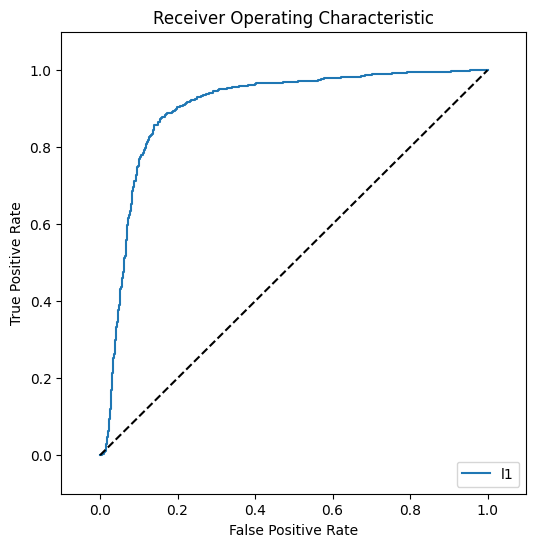

In [352]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
# Plot the ROC curve
fig = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [353]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred1))

0.8412286909643445


In [354]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9015804782173277


In [355]:
indices = np.argsort(-abs(model_lr.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
overachiever
underperformer
last_evaluation_missing
last_evaluation
n_projects
tenure
filed_complaint
salary_high
avg_monthly_hrs
salary_low
recently_promoted
unhappy
department_procurement
department_management
department_engineering
department_Missing
department_admin
department_IT
department_product
salary_medium
department_finance
department_marketing
department_support
department_sales


## 4.3 Model-2 Random Forest Classifier

In [356]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model_rf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [357]:
model_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', n_estimators=400)

In [358]:
y_train_pred2 = model_rf.predict(X_train)

In [359]:
y_pred2 = model_rf.predict(X_test)

In [360]:
# Get just the prediction for the positive class (1)
y_pred_proba2 = model_rf.predict_proba(X_test)[:,1]

In [361]:
# Display first 10 predictions
y_pred_proba2[:10]

array([0.01, 0.  , 0.04, 0.01, 0.11, 0.01, 0.73, 0.98, 0.99, 0.  ])

**Note:** Just as above, we can use these probabilities for model interpretation

In [362]:
# Predicting the target class for a new input
new_input = [100, 0, 0.1, 6, 1, 0.1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
predicted_class_new = model_rf.predict([new_input])[0]
predicted_proba_new = model_rf.predict_proba([new_input])[0]
print("For new input, predicted class = {}".format(predicted_class_new))
# print("For new input, predicted probabilities = {}".format(predicted_proba_new))

For new input, predicted class = True


In [363]:
# Predicting the target class for a new input
new_input2 = [200, 0, 0.4, 2, 0, 0.4, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]  
predicted_class_new2 = model_rf.predict([new_input2])[0]
predicted_proba_new2 = model_rf.predict_proba([new_input2])[0]
print("For new input, predicted class = {}".format(predicted_class_new2))
# print("For new input, predicted probabilities = {}".format(predicted_proba_new2))

For new input, predicted class = False


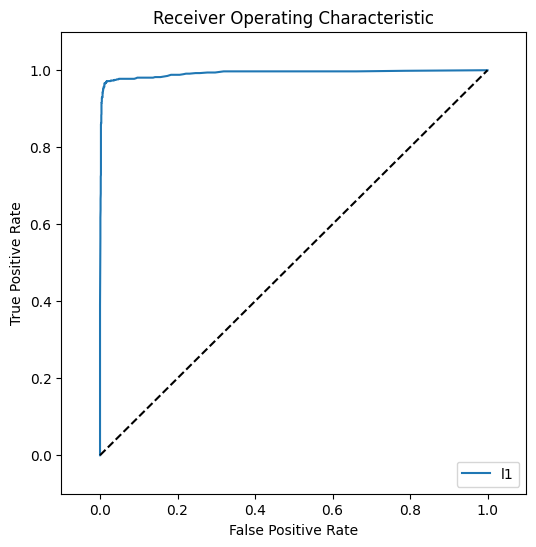

In [364]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)
# Plot the ROC curve
fig = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [365]:
# # Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred2))

1.0


In [366]:
# # Calculate AUC for Test set
print(auc(fpr, tpr))

0.9922693773930473


#### Feature Importance

In [367]:
## Building the model again with the best hyperparameters
model_rf = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, class_weight='balanced')
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [368]:
confusion_matrix(y_test, y_pred2).T

array([[2131,   51],
       [  10,  622]])

In [369]:
acc = accuracy_score(y_test, y_pred2, normalize=True) * float(100)  
## get the accuracy on testing data
print(acc)

97.83226723525232


In [370]:
indices = np.argsort(-model_rf.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
tenure
n_projects
avg_monthly_hrs
last_evaluation
overachiever
unhappy
underperformer
filed_complaint
salary_low
salary_high
department_engineering
department_sales
salary_medium
last_evaluation_missing
department_support
department_Missing
department_IT
department_finance
recently_promoted
department_management
department_marketing
department_product
department_admin
department_procurement


## 4.4 Model-3 XGBoost

In [371]:
from collections import Counter

counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print(scale_pos_weight)

3.17743132887899


In [372]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0], 'scale_pos_weight':[scale_pos_weight]}
model_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model_xgb.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0],
                                        'scale_pos_weight': [3.17743132887899]},
                   scoring='roc_auc')

In [373]:
model_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [374]:
y_train_pred3 = model_xgb.predict(X_train)

In [375]:
y_pred3 = model_xgb.predict(X_test)

In [376]:
# Get just the prediction for the positive class (1)
y_pred_proba3 = model_xgb.predict_proba(X_test)[:,1]

In [377]:
# Display first 10 predictions
formatted_predictions = np.array2string(
    y_pred_proba3[:10],
    formatter={'float_kind': lambda x: f"{x:.2f}"}
)
print(formatted_predictions)

[0.04 0.02 0.14 0.04 0.23 0.03 0.94 0.98 1.00 0.00]


**Note:** Just as above we can use these probabilities to get model interpretation

In [378]:
# Predicting the target class for a new input
new_input = [200, 1, 0.6, 3, 0, 0.6, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
predicted_class_new = model_xgb.predict([new_input])[0]
predicted_proba_new = model_xgb.predict_proba([new_input])[0]
print("For new input, predicted class = {}".format(predicted_class_new))
# print("For new input, predicted probabilities = {}".format(predicted_proba_new))

For new input, predicted class = 1


In [379]:
# Predicting the target class for a new input
new_input2 = [200, 0, 0.4, 2, 0, 0.4, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]  
predicted_class_new2 = model_xgb.predict([new_input2])[0]
predicted_proba_new2 = model_xgb.predict_proba([new_input2])[0]
print("For new input, predicted class = {}".format(predicted_class_new2))
# print("For new input, predicted probabilities = {}".format(predicted_proba_new2))

For new input, predicted class = 0


In [380]:
confusion_matrix(y_test, y_pred3).T

array([[2106,   39],
       [  35,  634]])

In [381]:
acc = accuracy_score(y_test, y_pred3, normalize=True) * float(100)  
## get the accuracy on testing data
print(acc)

97.37029140014215


In [382]:
# # Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)

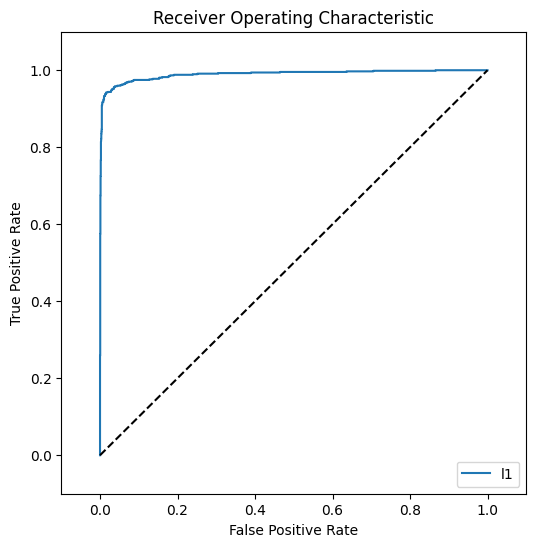

In [383]:
# Plot the ROC curve
fig = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [384]:
# Calculate AUC for Train
print(roc_auc_score(y_train, y_train_pred3))

0.9705917528741614


In [385]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9892597854247333


#### Feature Importance

In [386]:
model_xgb = XGBClassifier(max_depth=5,learning_rate=0.05,n_estimators=400, reg_lambda=0.001,
    scale_pos_weight=scale_pos_weight,   # weight to balance classes
    use_label_encoder=False,
    eval_metric='logloss')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [387]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

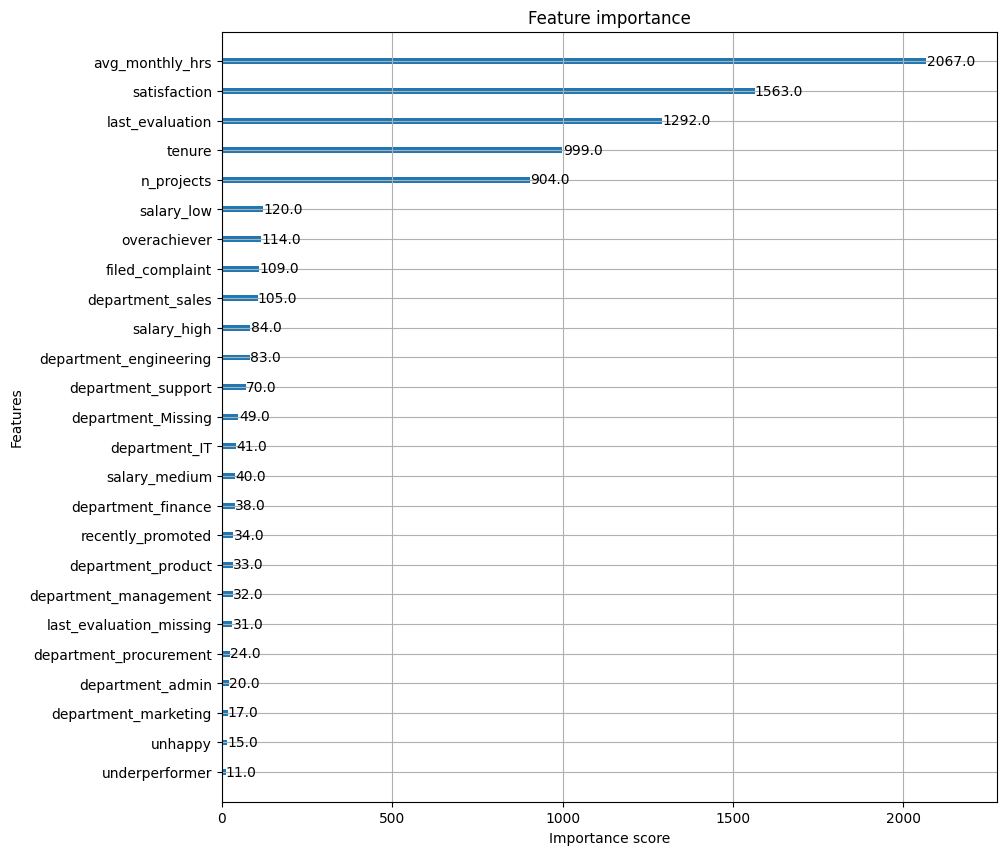

In [388]:
my_plot_importance(model_xgb, (10,10))

# 4.5 Model-4 KNN

In [389]:
%pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [390]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)), ('knn',  KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 1.


In [391]:
MSE.index(min(MSE))

0

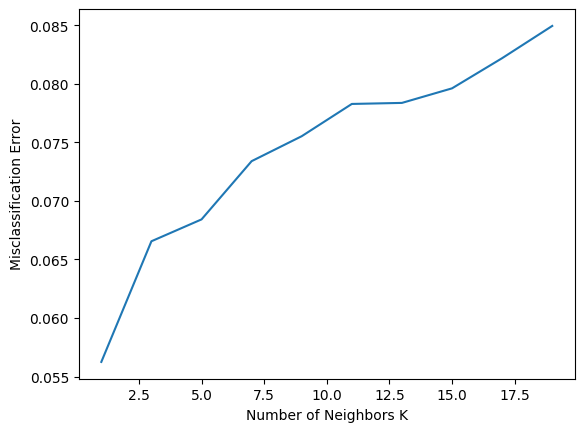

In [392]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [401]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Train KNN on the resampled data
model_knn = KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights='distance'
)
model_knn.fit(X_resampled, y_resampled)

# print(X_resampled.shape[0])
# print(X_resampled.shape[1])
# print(X_train)
# print(y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [403]:
print("Original class distribution:")
print(Counter(y_train))

print("\nResampled class distribution:")
print(Counter(y_resampled))

# 4. Calculate number of synthetic samples added
original_counts = Counter(y_train)
resampled_counts = Counter(y_resampled)
minority_class = min(original_counts, key=original_counts.get)
synthetic_samples_added = resampled_counts[minority_class] - original_counts[minority_class]
print(f"\nNumber of synthetic samples added to class '{minority_class}': {synthetic_samples_added}")

Original class distribution:
Counter({False: 8560, True: 2694})

Resampled class distribution:
Counter({True: 8560, False: 8560})

Number of synthetic samples added to class 'True': 5866


In [244]:
y_pred4 = model_knn.predict(X_test)

In [245]:
y_train_pred4 = model_knn.predict(X_train)

In [246]:
# Get just the prediction for the positive class (1)
y_pred_proba4 = model_knn.predict_proba(X_test)[:,1]

In [247]:
# Display first 10 predictions
formatted_predictions = np.array2string(
    y_pred_proba4[:10],
    formatter={'float_kind': lambda x: f"{x:.2f}"}
)
print(formatted_predictions)

[0.00 0.00 0.00 0.00 0.00 0.00 1.00 1.00 1.00 0.00]


In [248]:
# Predicting the target class for a new input
new_input = [200, 1, 0.6, 3, 0, 0.6, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
predicted_class_new = model_knn.predict([new_input])[0]
predicted_proba_new = model_knn.predict_proba([new_input])[0]
print("For new input, predicted class = {}, predicted probabilities = {}".format(predicted_class_new, predicted_proba_new))

For new input, predicted class = True, predicted probabilities = [0. 1.]


In [249]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba4)

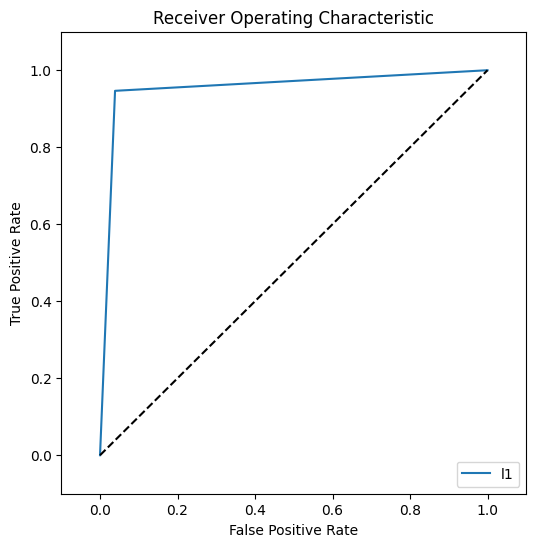

In [250]:
# Plot the ROC curve
fig = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [251]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred4))

1.0


In [252]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9538706205110302


In [253]:
confusion_matrix(y_test, y_pred4).T

array([[2058,   36],
       [  83,  637]])

In [254]:
acc = accuracy_score(y_test, y_pred4, normalize=True) * float(100)  
## get the accuracy on testing data
print(acc)

95.77114427860697


## 4.6. Model-5 Decision Trees

In [255]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model_dt = RandomizedSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1, random_state=42)
model_dt.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   random_state=42, scoring='roc_auc')

In [256]:
model_dt.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=42)

In [257]:
y_train_pred5 = model_dt.predict(X_train)

In [258]:
y_pred5 = model_dt.predict(X_test)

In [259]:
y_pred_proba5 = model_dt.predict_proba(X_test)[:,1]

In [260]:
y_pred_proba5[:10]

array([0.1 , 0.02, 0.05, 0.02, 0.1 , 0.02, 0.99, 0.99, 0.99, 0.02])

In [261]:
# Predicting the target class for a new input
new_input = [200, 1, 0.6, 3, 0, 0.6, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
predicted_class_new = model_dt.predict([new_input])[0]
predicted_proba_new = model_dt.predict_proba([new_input])[0]
print("For new input, predicted class = {}, predicted probabilities = {}".format(predicted_class_new, predicted_proba_new))

For new input, predicted class = False, predicted probabilities = [1. 0.]


In [262]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba5)

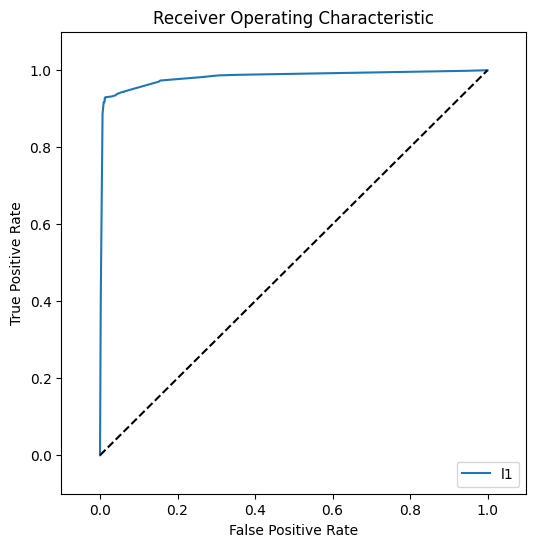

In [263]:
# Plot the ROC curve
fig = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [264]:
# Calculate AUC for Train
print(roc_auc_score(y_train, y_train_pred5))

0.9618243899562198


In [265]:
print(auc(fpr, tpr))

0.981521181656098


#### Feature Importance

In [266]:
## Building the model again with the best hyperparameters
model_dt = DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=1, max_depth=7,
    class_weight='balanced', random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=7, random_state=42)

In [267]:
confusion_matrix(y_test, y_pred5).T

array([[2105,   47],
       [  36,  626]])

In [268]:
acc = accuracy_score(y_test, y_pred5, normalize=True) * float(100)  
## get the accuracy on testing data
print(acc)

97.0504619758351


In [269]:
indices = np.argsort(-model_dt.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
tenure
avg_monthly_hrs
n_projects
overachiever
last_evaluation
department_engineering
filed_complaint
department_sales
department_support
department_Missing
department_finance
recently_promoted
salary_medium
department_product
last_evaluation_missing
department_admin
underperformer
unhappy
department_IT
department_procurement
department_marketing
salary_high
department_management
salary_low


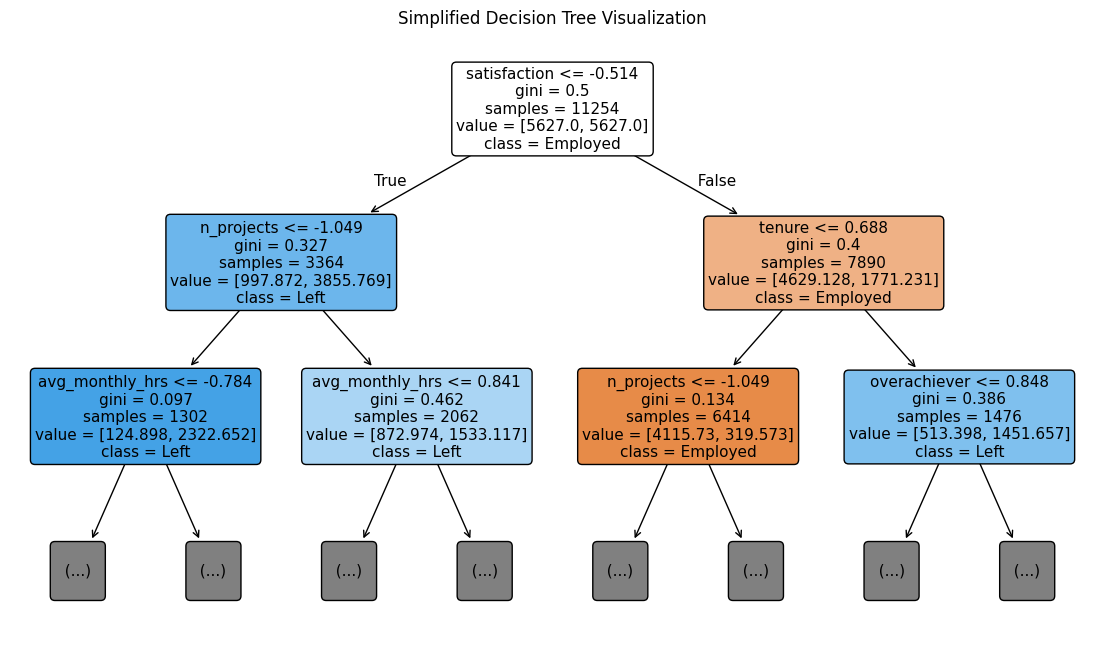

In [314]:
from sklearn.tree import plot_tree

# Plot the decision tree with a limited depth
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plot_tree(
    model_dt,
    feature_names=X_train.columns,
    class_names=['Employed', 'Left'],
    filled=True,
    rounded=True,
    fontsize=11,
    max_depth=2  # Limit the depth of the tree in the plot
)
plt.title("Simplified Decision Tree Visualization")
plt.show()

## 4.7 Model-6 SVC

In [270]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    svc = SVC(kernel='rbf', class_weight='balanced', probability=True)
    # 2) run grid search over C and gamma
    grid_search = GridSearchCV(svc, param_grid, cv=nfolds, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_


In [271]:
svc_param_selection(X_train, y_train, 5)

{'C': 10, 'gamma': 0.1}

In [272]:
# Build model with best hyperparameters
model_svc = SVC(C=10, gamma=1, probability=True, kernel='rbf', class_weight='balanced')
model_svc.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=1, probability=True)

In [273]:
## Predict Train results
y_train_pred6 = model_svc.predict(X_train)

In [274]:
## Predict Test results
y_pred6 = model_svc.predict(X_test)

In [275]:
y_pred_proba6 = model_dt.predict_proba(X_test)[:,1]
y_pred_proba6[:10]

array([0.06, 0.02, 0.01, 0.02, 0.24, 0.02, 0.99, 0.99, 0.99, 0.01])

In [276]:
confusion_matrix(y_test, y_pred6).T

array([[2112,   43],
       [  29,  630]])

In [277]:
print(accuracy_score(y_test, y_pred4, normalize=True) * float(100))

95.77114427860697


In [278]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba6)

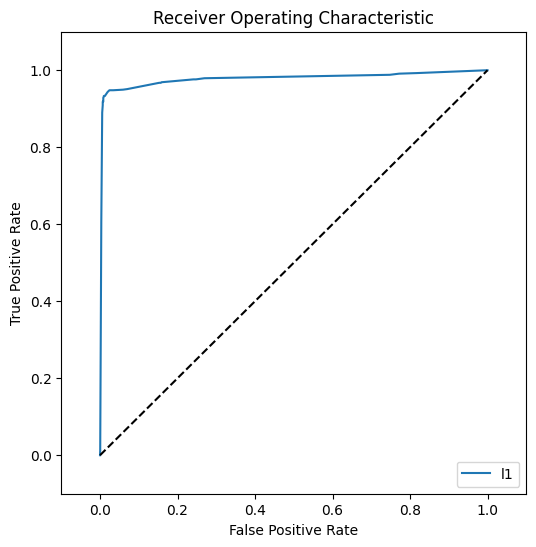

In [279]:
# Plot the ROC curve
fig = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [280]:
# Calculate AUC for Train
print(roc_auc_score(y_train, y_train_pred6))

0.9965330103587756


In [281]:
print(auc(fpr, tpr))

0.9778418661205239


In [282]:
# Predicting the target class for a new input
new_input = [200, 1, 0.6, 3, 0, 0.6, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
predicted_class_new = model_svc.predict([new_input])[0]
predicted_proba_new = model_svc.predict_proba([new_input])[0]
print("For new input, predicted class = {}, predicted probabilities = {}".format(predicted_class_new, predicted_proba_new))

For new input, predicted class = False, predicted probabilities = [0.97 0.03]


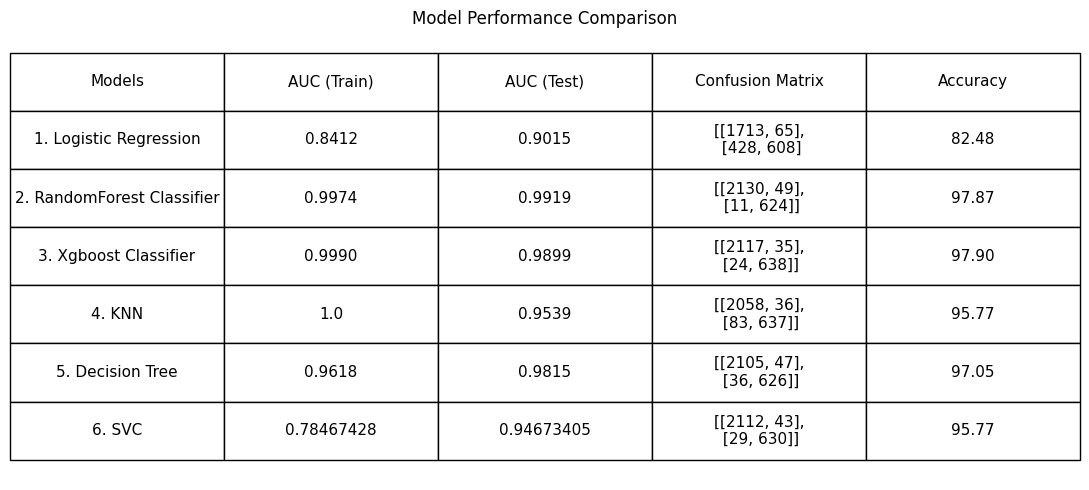

In [1]:
import matplotlib.pyplot as plt

results = [
    ["1. Logistic Regression", "0.8412", "0.9015", "[[1713, 65],\n [428, 608]", "82.48"],
    ["2. RandomForest Classifier", "0.9974", "0.9919", "[[2130, 49],\n [11, 624]]", "97.87"],
    ["3. Xgboost Classifier", "0.9990", "0.9899", "[[2117, 35],\n [24, 638]]","97.90"],
    ["4. KNN", "1.0", "0.9539", "[[2058, 36],\n [83, 637]]", "95.77"],
    ["5. Decision Tree", "0.9618", "0.9815", "[[2105, 47],\n [36, 626]]", "97.05"],
    ["6. SVC", "0.78467428", "0.94673405", "[[2112, 43],\n [29, 630]]", "95.77"]
]

columns = ["Models", "AUC (Train)", "AUC (Test)", "Confusion Matrix", "Accuracy"]

fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

table = ax.table(cellText=results,
                colLabels=columns,
                loc='center',
                cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

# Increase the vertical scale to increase row height
table.scale(1, 2)  # Increased vertical scale

# Optionally, you can also increase the font size slightly
for cell in table.get_celld().values():
    cell.set_height(cell.get_height() * 1.5) # Further adjust cell height

plt.title("Model Performance Comparison")
plt.tight_layout()
plt.show()